           date   open   high  close    low      volume  price_change  \
607  2018-05-02  10.97  11.03  10.88  10.80  1190523.25          0.03   
606  2018-05-03  10.86  10.88  10.75  10.57  1281355.62         -0.13   
605  2018-05-04  10.73  10.83  10.68  10.66   710509.50         -0.07   
604  2018-05-07  10.70  10.83  10.81  10.64   974309.69          0.13   
603  2018-05-08  10.83  11.15  11.01  10.80  1373305.62          0.20   

     p_change     ma5    ma10    ma20       v_ma5      v_ma10      v_ma20  \
607      0.28  10.880  10.880  10.880  1190523.25  1190523.25  1190523.25   
606     -1.20  10.815  10.815  10.815  1235939.44  1235939.44  1235939.44   
605     -0.65  10.770  10.770  10.770  1060796.12  1060796.12  1060796.12   
604      1.22  10.780  10.780  10.780  1039174.52  1039174.52  1039174.52   
603      1.85  10.826  10.826  10.826  1106000.74  1106000.74  1106000.74   

     turnover  
607      0.70  
606      0.76  
605      0.42  
604      0.58  
603      0.81  


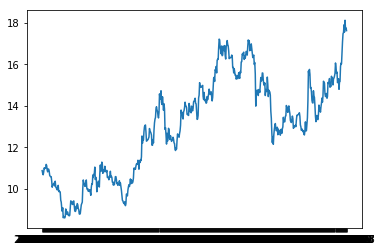

In [68]:
import matplotlib.pylab as plt
import pandas as pd
import numpy as np

hist = pd.read_csv("./../../TushareStock/Stocks/t_000001", sep='\t',  names=["date", "open", "high","close","low","volume","price_change","p_change","ma5","ma10","ma20","v_ma5","v_ma10","v_ma20","turnover"], header=0)
hist = hist.iloc[::-1]
print(hist.head())

plt.plot(hist['date'], hist['close'])
plt.show()

In [69]:
# # 转化为时间序列数据
ahist = hist['close'].tolist()

WINDOW = 30
EMB_SIZE = 1
STEP = 1
FORECAST = 1

In [70]:
# Straightforward way for creating time windows
X, Y = [], []
for i in range(0, len(ahist), STEP): 
    try:
        x_i = ahist[i:i+WINDOW]
        y_i = ahist[i+WINDOW+FORECAST]  

        last_close = x_i[WINDOW-1]
        next_close = y_i

        if last_close < next_close:
            y_i = [1, 0]
        else:
            y_i = [0, 1] 

    except Exception as e:
        print(e)
        break

    X.append(x_i)
    Y.append(y_i)

X = [(np.array(x) - np.mean(x)) / np.std(x) for x in X] # comment it to remove normalization
X, Y = np.array(X), np.array(Y)
print (X.shape, Y.shape)

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation
from keras import regularizers
from keras.layers.normalization import BatchNormalization
from keras.layers import LeakyReLU

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

model = Sequential()
model.add(Dense(64, input_dim=WINDOW, activity_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(0.5))
model.add(Dense(16, activity_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dense(2))
model.add(Activation('softmax'))

from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, CSVLogger, EarlyStopping
from keras.optimizers import RMSprop, Adam, SGD, Nadam

opt = Nadam(lr=0.001)

reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.9, patience=25, min_lr=0.000001, verbose=1)
checkpointer = ModelCheckpoint(filepath="test.hdf5", verbose=1, save_best_only=True)
early_stopper = EarlyStopping(monitor='val_loss', min_delta=0.05, patience=20, verbose=0, mode='auto')
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

list index out of range
(577, 30) (577, 2)


In [73]:
history = model.fit(X_train, Y_train, epochs = 100, batch_size = 128, verbose=1, validation_data=(X_test, Y_test), shuffle=True, callbacks=[reduce_lr, checkpointer, early_stopper])

Train on 432 samples, validate on 145 samples
Epoch 1/100
432/432 [==============================] - 0s 23us/step - loss: 4.8226 - acc: 0.5347 - val_loss: 3.8128 - val_acc: 0.5034

Epoch 00001: val_loss improved from 3.84460 to 3.81277, saving model to test.hdf5
Epoch 2/100
432/432 [==============================] - 0s 20us/step - loss: 4.7414 - acc: 0.5509 - val_loss: 3.7837 - val_acc: 0.5034

Epoch 00002: val_loss improved from 3.81277 to 3.78375, saving model to test.hdf5
Epoch 3/100
432/432 [==============================] - 0s 19us/step - loss: 4.6222 - acc: 0.5324 - val_loss: 3.7535 - val_acc: 0.5034

Epoch 00003: val_loss improved from 3.78375 to 3.75349, saving model to test.hdf5
Epoch 4/100
432/432 [==============================] - 0s 20us/step - loss: 4.5564 - acc: 0.5347 - val_loss: 3.7221 - val_acc: 0.4966

Epoch 00004: val_loss improved from 3.75349 to 3.72215, saving model to test.hdf5
Epoch 5/100
432/432 [==============================] - 0s 19us/step - loss: 4.5308 - a

432/432 [==============================] - 0s 19us/step - loss: 3.2241 - acc: 0.5741 - val_loss: 2.9103 - val_acc: 0.4690

Epoch 00038: val_loss improved from 2.92756 to 2.91035, saving model to test.hdf5
Epoch 39/100
432/432 [==============================] - 0s 19us/step - loss: 3.2107 - acc: 0.5046 - val_loss: 2.8922 - val_acc: 0.4621

Epoch 00039: val_loss improved from 2.91035 to 2.89224, saving model to test.hdf5
Epoch 40/100
432/432 [==============================] - 0s 18us/step - loss: 3.1447 - acc: 0.5694 - val_loss: 2.8750 - val_acc: 0.4690

Epoch 00040: val_loss improved from 2.89224 to 2.87497, saving model to test.hdf5
Epoch 41/100
432/432 [==============================] - 0s 20us/step - loss: 3.1974 - acc: 0.5046 - val_loss: 2.8571 - val_acc: 0.4483

Epoch 00041: val_loss improved from 2.87497 to 2.85715, saving model to test.hdf5
Epoch 42/100
432/432 [==============================] - 0s 19us/step - loss: 3.1816 - acc: 0.5185 - val_loss: 2.8397 - val_acc: 0.4552

Epoch

432/432 [==============================] - 0s 19us/step - loss: 2.4512 - acc: 0.5463 - val_loss: 2.3623 - val_acc: 0.4621

Epoch 00075: val_loss improved from 2.37495 to 2.36231, saving model to test.hdf5
Epoch 76/100
432/432 [==============================] - 0s 20us/step - loss: 2.3972 - acc: 0.5880 - val_loss: 2.3506 - val_acc: 0.4759

Epoch 00076: val_loss improved from 2.36231 to 2.35056, saving model to test.hdf5
Epoch 77/100
432/432 [==============================] - 0s 18us/step - loss: 2.4032 - acc: 0.5648 - val_loss: 2.3387 - val_acc: 0.4690

Epoch 00077: val_loss improved from 2.35056 to 2.33872, saving model to test.hdf5
Epoch 78/100
432/432 [==============================] - 0s 19us/step - loss: 2.3752 - acc: 0.6042 - val_loss: 2.3273 - val_acc: 0.4552

Epoch 00078: val_loss improved from 2.33872 to 2.32728, saving model to test.hdf5
Epoch 79/100
432/432 [==============================] - 0s 18us/step - loss: 2.4007 - acc: 0.5694 - val_loss: 2.3147 - val_acc: 0.4552

Epoch

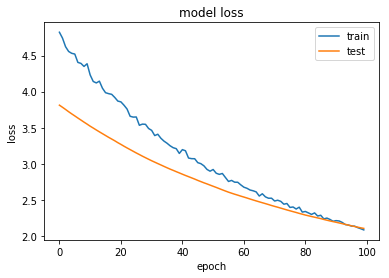

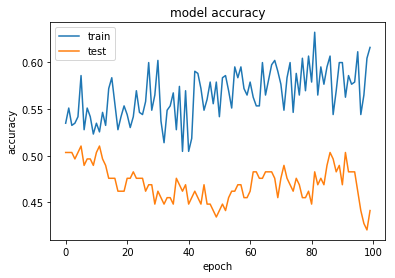

In [74]:
plt.figure() 
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('model loss') 
plt.ylabel('loss') 
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='best') 
plt.figure()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()